# Contents 

### 01. import libraries and data
### 02. Data wrangling and cleaning
### 03. Plotting a cloropleth
### 04. Discussing results

## 01. Import libraies and data

In [2]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import os
import folium
import json
import matplotlib.pyplot as plt

In [3]:
print(folium.__file__)
print(folium.__version__)

C:\Users\David\anaconda3\Lib\site-packages\folium\__init__.py
0.15.0


In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [43]:
# Import ".json" file for King County
county_geo = r'C:/Users/David/Desktop/Career Foundry/King County house sales/02. Data/01. Original Data/Zipcodes_King_County.geojson'

In [45]:
path = 'C:/Users/David/Desktop/Career Foundry/King County house sales'

In [7]:
# Import KC house sales data

kc_houses = pd.read_csv(os.path.join(path, '02. Data', '02. Prepared Data', 'kc_houses_updated2.csv'))

In [8]:
kc_houses.head()

Unnamed: 0    house_id   date_sold     price  bedrooms  bathrooms  \
0           0  7129300520  2014-10-13  221900.0         3       1.00   
1           1  6414100192  2014-12-09  538000.0         3       2.25   
2           2  5631500400  2015-02-25  180000.0         2       1.00   
3           3  2487200875  2014-12-09  604000.0         4       3.00   
4           4  1954400510  2015-02-18  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  condition  grade  \
0         1180      5650     1.0  7129300520  ...          3      7   
1         2570      7242     2.0  6414100192  ...          3      7   
2          770     10000     1.0  5631500400  ...          3      6   
3         1960      5000     1.0  2487200875  ...          5      7   
4         1680      8080     1.0  1954400510  ...          3      8   

   sqft_above  sqft_basement  year_built  year_renovated  zipcode      lat  \
0        1180              0        1955               0    98178  47.5112   
1        2170            400        1951            1991    98125  47.7210   
2         770              0        1933               0    98028  47.7379   
3        1050            910        1965               0    98136  47.5208   
4        1680              0        1987               0    98074  47.6168   

      long  price_category  
0 -122.257       Low-level  
1 -122.319     Mid-1 Level  
2 -122.233       Low-level  
3 -122.393     Mid-2 Level  
4 -122.045     Mid-1 Level  

[5 rows x 21 columns]

## 02. Data wrangling and cleaning

In [9]:
# Create a subset of necessary columns 
columns = ['house_id', 'price','sqft_living','condition', 'grade','zipcode', 'price_category', 'lat','long']

In [10]:
kc_houses_geo = kc_houses[columns]

In [11]:
# Check for missing values 
kc_houses_geo.isnull().sum()

house_id          0
price             0
sqft_living       0
condition         0
grade             0
zipcode           0
price_category    0
lat               0
long              0
dtype: int64

In [12]:
kc_houses_geo.dtypes

house_id            int64
price             float64
sqft_living         int64
condition           int64
grade               int64
zipcode             int64
price_category     object
lat               float64
long              float64
dtype: object

C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

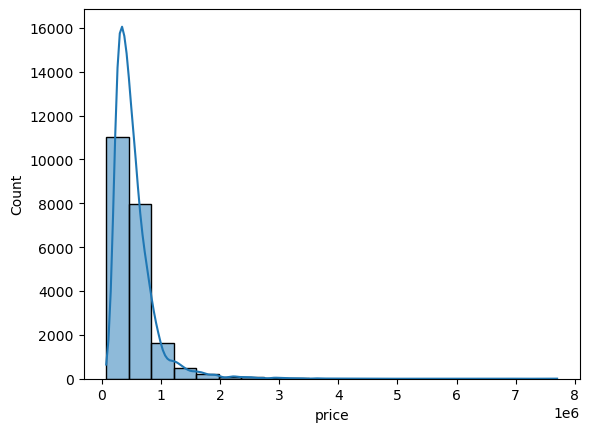

In [13]:
# Check extremes in 'price'
sns.histplot(kc_houses_geo['price'], bins=20, kde = True)

In [14]:
# Change zipcode to a string
kc_houses['zipcode'] = kc_houses['zipcode'].astype(str)

In [15]:
# Check how many extreme values

kc_houses_geo[kc_houses_geo['price'] >2000000]

house_id      price  sqft_living  condition  grade  zipcode  \
153    7855801670  2250000.0         5180          3     12    98006   
246    2025069065  2400000.0         3650          3      9    98074   
269    7960900060  2900000.0         5050          3     11    98004   
282    7424700045  2050000.0         3830          5      9    98122   
300    3225069065  3075000.0         4550          3     10    98074   
...           ...        ...          ...        ...    ...      ...   
21310  2154970020  2351960.0         5010          3     11    98040   
21368  9533100285  2065000.0         4350          3     10    98004   
21506  2524069097  2238890.0         7270          3     12    98027   
21530  8964800330  3000000.0         5090          3     11    98004   
21576  9253900271  3567000.0         4850          3     10    98008   

      price_category      lat     long  
153         High-end  47.5620 -122.162  
246         High-end  47.6338 -122.072  
269         High-end  47.6312 -122.223  
282         High-end  47.6166 -122.287  
300         High-end  47.6053 -122.077  
...              ...      ...      ...  
21310       High-end  47.5455 -122.211  
21368       High-end  47.6289 -122.205  
21506       High-end  47.5371 -121.982  
21530       High-end  47.6200 -122.207  
21576       High-end  47.5943 -122.110  

[198 rows x 9 columns]

C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='grade', ylabel='Count'>

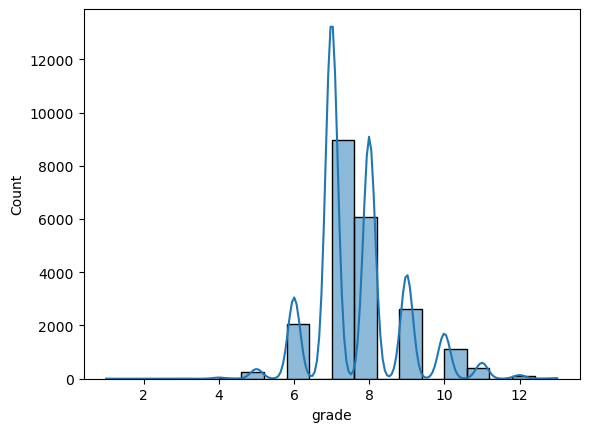

In [16]:
# Check extremes in 'grade'
sns.histplot(kc_houses_geo['grade'], bins=20, kde = True)

In [17]:
# Check how many extreme values

kc_houses_geo[kc_houses_geo['grade'] <5]

house_id     price  sqft_living  condition  grade  zipcode  \
350    7325600160  299000.0          560          3      4    98014   
465    8658300340   80000.0          430          2      4    98014   
1066   3340401535  140000.0          730          4      4    98055   
1149   3421079032   75000.0          670          3      3    98022   
3223   2420069251  262000.0          520          5      3    98022   
3582   1925069006  355000.0          530          4      4    98074   
3885   5279100625  248000.0          770          4      4    98027   
4868   6896300380  228000.0          390          2      4    98118   
5204   4048400185  352000.0          760          4      4    98059   
5832   5702500050  280000.0          600          2      3    98045   
6480   7203601405  217000.0          730          3      4    98198   
7973   3122069029  120000.0          990          2      4    98042   
8597   6730700385  205000.0          770          3      4    98024   
8619   1823069059  355000.0          750          4      4    98059   
8623   6303400395  325000.0          410          2      4    98146   
9641   4391600065  330000.0          520          4      4    98010   
9794   3760500240  435000.0          750          3      4    98034   
11500  4322200105  229050.0          420          4      4    98136   
11588  6453300055  188000.0          550          3      4    98106   
12075  8655900162  156000.0          470          3      4    98014   
14001  2354300456  130000.0          600          4      4    98027   
14091  1822059057  152000.0          700          3      4    98031   
14581  6929602721   95000.0          960          3      4    98198   
15040  3623059027  200000.0          780          4      4    98058   
15712  3089000005  150000.0          850          1      4    98023   
16340  6146600170  100000.0          660          4      4    98032   
16530  2114700500   90000.0          560          3      4    98106   
17394   745000005  145000.0          480          2      4    98146   
18052  1352300580  247000.0          460          3      4    98055   
18166  3664500300  230000.0         1470          3      4    98059   
18379  1222029077  265000.0          384          3      4    98070   
19344  2114700090  151000.0          720          3      4    98106   
19452  3980300371  142000.0          290          1      1    98024   

      price_category      lat     long  
350        Low-level  47.6750 -121.854  
465        Low-level  47.6499 -121.909  
1066       Low-level  47.4670 -122.215  
1149       Low-level  47.2638 -121.906  
3223       Low-level  47.2082 -121.995  
3582     Mid-1 Level  47.6412 -122.079  
3885       Low-level  47.5325 -122.031  
4868       Low-level  47.5260 -122.261  
5204     Mid-1 Level  47.4703 -122.076  
5832       Low-level  47.5316 -121.749  
6480       Low-level  47.3500 -122.322  
7973       Low-level  47.3577 -122.085  
8597       Low-level  47.5661 -121.887  
8619     Mid-1 Level  47.4756 -122.090  
8623     Mid-1 Level  47.5077 -122.357  
9641     Mid-1 Level  47.3260 -122.037  
9794     Mid-1 Level  47.6985 -122.229  
11500      Low-level  47.5375 -122.391  
11588      Low-level  47.5181 -122.339  
12075      Low-level  47.6554 -121.908  
14001      Low-level  47.5289 -122.033  
14091      Low-level  47.3882 -122.208  
14581      Low-level  47.3864 -122.307  
15040      Low-level  47.4420 -122.105  
15712      Low-level  47.2959 -122.377  
16340      Low-level  47.3881 -122.234  
16530      Low-level  47.5335 -122.348  
17394      Low-level  47.4982 -122.362  
18052      Low-level  47.4868 -122.199  
18166      Low-level  47.4878 -122.130  
18379      Low-level  47.4177 -122.491  
19344      Low-level  47.5323 -122.347  
19452      Low-level  47.5308 -121.888

C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='condition', ylabel='Count'>

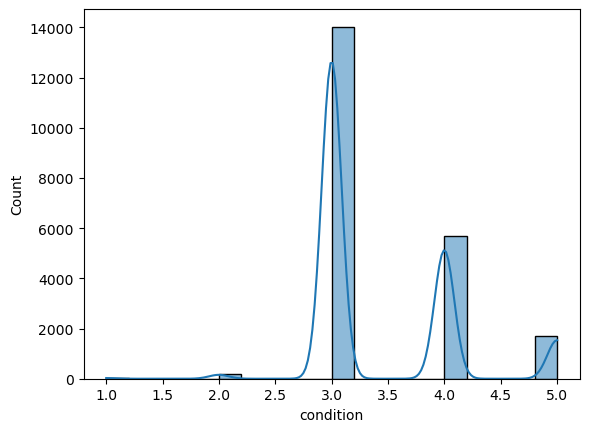

In [18]:
# Check extremes in 'condition'
sns.histplot(kc_houses_geo['condition'], bins=20, kde = True)

In [19]:
# Check how many extreme values

kc_houses_geo[kc_houses_geo['condition'] <3]

house_id     price  sqft_living  condition  grade  zipcode  \
36     9435300030  550000.0         1660          1      5    98052   
38     7895500070  240000.0         1220          2      7    98001   
242    1868901275  455000.0         1430          2      7    98115   
328    1665400045  186375.0         1000          2      7    98166   
380    1726059053  270000.0         1380          1      6    98011   
...           ...       ...          ...        ...    ...      ...   
19363  9485920120  290000.0         2340          2      8    98042   
19448  2023059052  450000.0         1350          2      6    98055   
19452  3980300371  142000.0          290          1      1    98024   
19512  2023049361  246500.0          940          2      7    98148   
19621  7205400180  235000.0         1240          2      7    98198   

      price_category      lat     long  
36       Mid-1 Level  47.6621 -122.132  
38         Low-level  47.3341 -122.282  
242      Mid-1 Level  47.6727 -122.299  
328        Low-level  47.4720 -122.344  
380        Low-level  47.7461 -122.195  
...              ...      ...      ...  
19363      Low-level  47.3468 -122.091  
19448    Mid-1 Level  47.4657 -122.198  
19452      Low-level  47.5308 -121.888  
19512      Low-level  47.4631 -122.329  
19621      Low-level  47.3514 -122.315  

[202 rows x 9 columns]

## 03. Create choropleth maps

In [20]:
# Create a data frame with just the zipcodes and grade

data_to_plot = kc_houses_geo[['zipcode','grade']]
data_to_plot.head()

zipcode  grade
0    98178      7
1    98125      7
2    98028      6
3    98136      7
4    98074      8

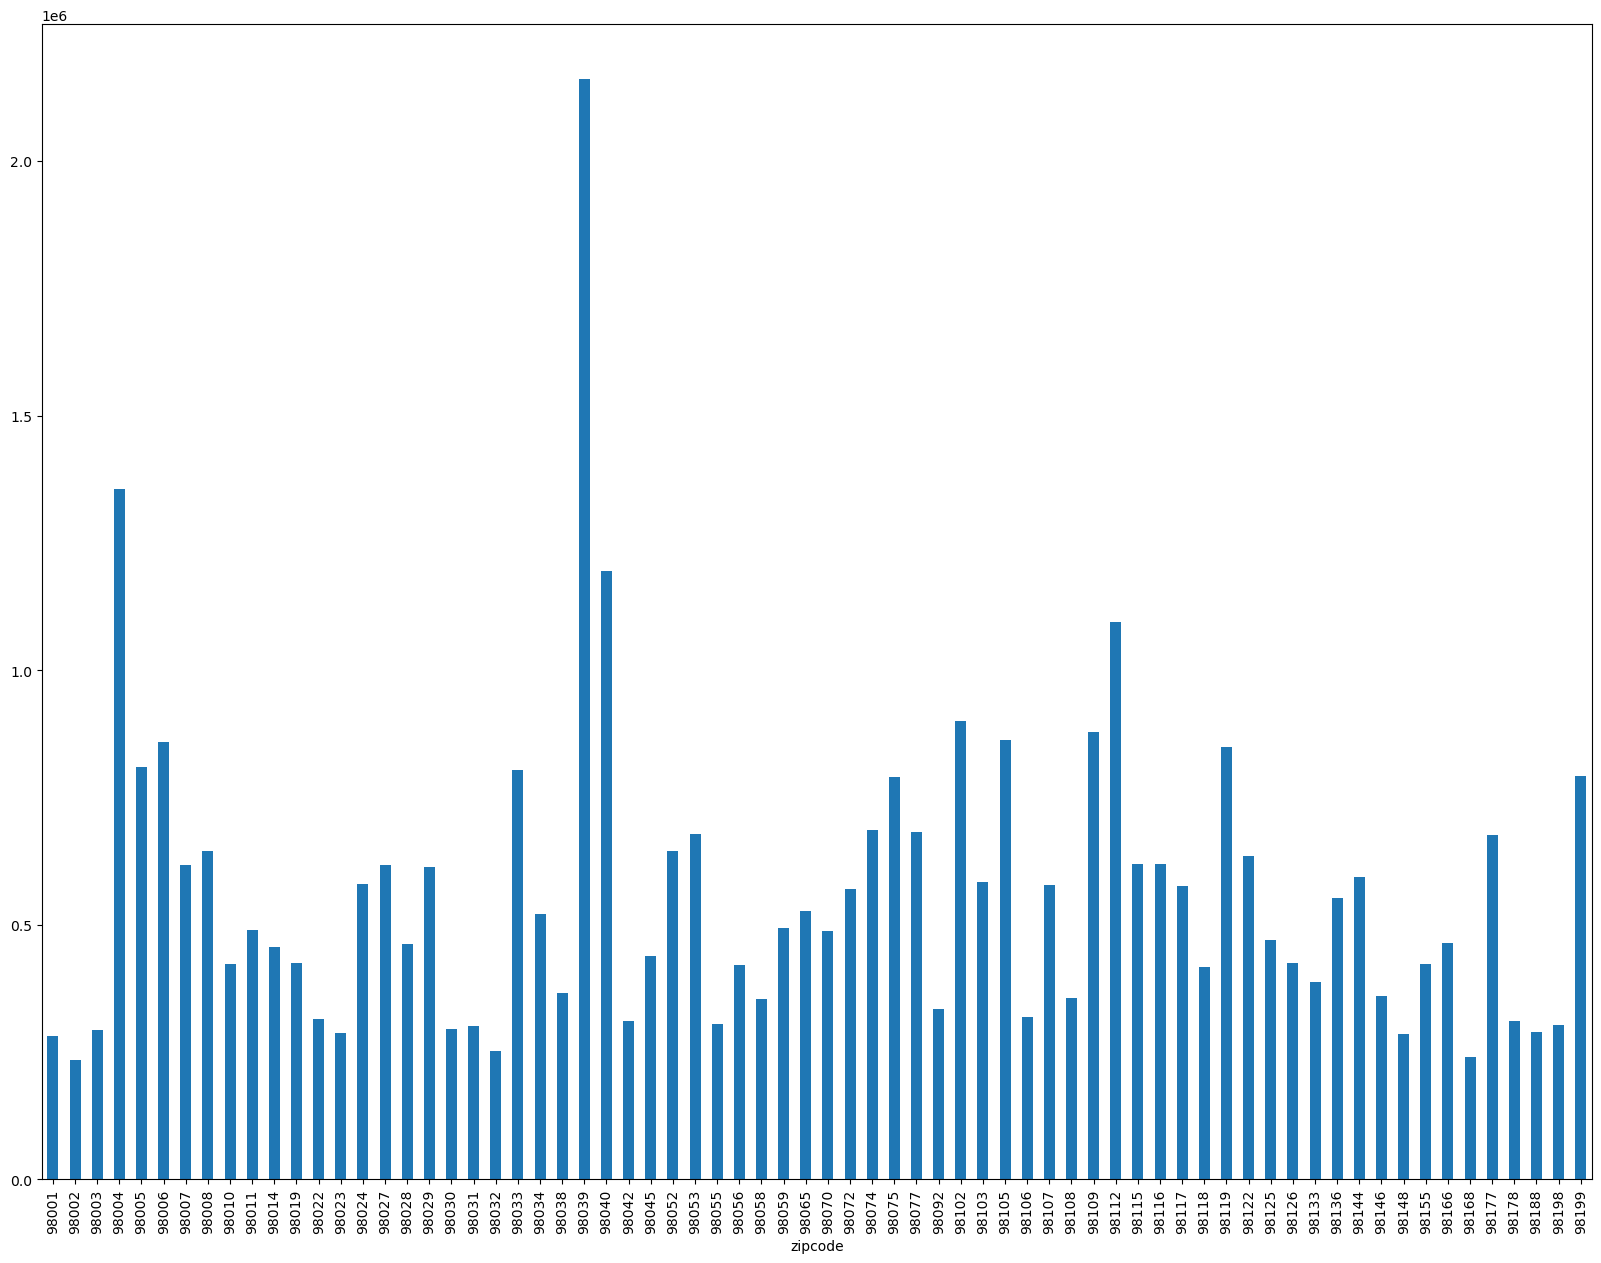

In [21]:
fig, ax = plt.subplots(figsize=(20,15))
kc_houses_geo.groupby('zipcode')['price'].mean().plot.bar()
plt.show()

In [22]:
# Calculating each zipcodes price mean
df_geo = kc_houses_geo.groupby('zipcode')[['price']].mean().reset_index()


In [23]:
df_geo

zipcode         price
0     98001  2.808047e+05
1     98002  2.342840e+05
2     98003  2.941113e+05
3     98004  1.355927e+06
4     98005  8.101649e+05
..      ...           ...
65    98177  6.761854e+05
66    98178  3.106128e+05
67    98188  2.890783e+05
68    98198  3.028789e+05
69    98199  7.918208e+05

[70 rows x 2 columns]

### Average sale price by zipcode

In [24]:
avg_price_zipcode = kc_houses_geo.groupby('zipcode')['price'].mean().round(2)
df_zip_price = pd.DataFrame()
df_zip_price['ZIPCODE'] = avg_price_zipcode.index
df_zip_price['mean_price'] = avg_price_zipcode.values
df_zip_price['ZIPCODE'] = df_zip_price['ZIPCODE'].astype(str)

In [25]:
df_zip_price.dtypes

ZIPCODE        object
mean_price    float64
dtype: object

In [51]:
# Create a Folium map
m = folium.Map(location=[47.5480,-121.9836], zoom_start=10)

# Choropleth layer
folium.Choropleth(
    geo_data=county_geo,
    data=df_zip_price,
    columns=['ZIPCODE', 'mean_price'],
    key_on='feature.properties.ZIPCODE',
    fill_color="YlOrBr",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='MEAN SALE PRICE'
).add_to(m)

# Display the map
m

In [59]:
# Save viz
m.save("choropleth_map.html")

## 04. Results

Medina has on average, the most expensive homes. The areas around Lake Washington have the most expensive homes, which means that a waterfront might lead to a higher price.

Questions:
- Does a waterfront mean higher prices?
- What other factors lead to Medina and areas around Lake Washington's high sale prices? 
